In [34]:
import pandas as pd
import os

Langkah #1 Menggabungkan file 12 bulan dalam satu file



In [35]:
files = [files for files in os.listdir('/content/drive/MyDrive/Sales_Data')]
for file in files:
  print(file)

Sales_March_2019.csv
Sales_April_2019.csv
Sales_October_2019.csv
Sales_December_2019.csv
Sales_November_2019.csv
Sales_May_2019.csv
Sales_June_2019.csv
Sales_February_2019.csv
Sales_September_2019.csv
Sales_July_2019.csv
Sales_August_2019.csv
Sales_January_2019.csv


In [36]:
all_months_data = pd.DataFrame()

for file in files:
  df = pd.read_csv('/content/drive/MyDrive/Sales_Data/'+file)
  all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv('all_data.csv', index=False)

In [37]:
#buka data
raw_data = pd.read_csv('/content/drive/MyDrive/all_data.csv')
raw_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [38]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [39]:
#duplikat tabel suapaya mudah apabila mau melihat data original
df = raw_data

Clean Data

In [40]:
#menghapus baris yang tidak memiliki nilai/tidak ada data/null
df = df.dropna(how='any')
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [41]:
#cek data baris yang nilainya tidak relevan
dfidcheck1 = df[df['Order ID'] == 'Order ID']
dfidcheck1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [42]:
#hapus baris yang datanya tidak relevan
df = df[df['Order ID']!= 'Order ID']
#atau bisa pakai ini
#df = df.drop(df['Order ID'] == 'Order ID')
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


Langkah #2 Tambah kolom bulan

In [43]:
#ganti type menjadi datetime agar mudah diolah
df['Order Date'] = pd.to_datetime(df['Order Date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [44]:
df['Month'] = df['Order Date'].dt.month
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9


In [45]:
df['Hour'] = df['Order Date'].dt.hour
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,8
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,22
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,9


In [46]:
df['Price Each'] = pd.to_numeric(df['Price Each'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


3# Tambah kolom total penjualan / sales

In [48]:
df['Sales'] = df['Quantity Ordered']*df['Price Each']
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,8,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,22,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,9,11.99
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,20,8.97
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,16,700.00
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,7,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,17,379.99


4# Tambah kolom kota

In [49]:
def get_city(address):
  return address.split(',')[1]

def get_state(state):
  return state.split(',')[2].split(' ')[1]

df['City'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,8,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,22,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,9,11.99,Los Angeles (CA)


Pertanyaan #1 Bulan dengan penjualan terbanyak? Berapa pendapatan pada bulan itu?

In [50]:
bulantotal = df.groupby('Month').sum()
bulantotal

,Quantity Ordered,Price Each,Hour,Sales
Month,,,,
1,10903,1.811768e+06,139485,1.822257e+06
2,13449,2.188885e+06,172669,2.202022e+06
3,17005,2.791208e+06,218969,2.807100e+06
4,20558,3.367671e+06,262259,3.390670e+06
5,18667,3.135125e+06,238780,3.152607e+06
6,15253,2.562026e+06,195528,2.577802e+06
7,16072,2.632540e+06,206169,2.647776e+06
8,13448,2.230345e+06,172289,2.244468e+06
9,13109,2.084992e+06,168513,2.097560e+06


In [77]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-pastel')
plt.rcParams["figure.figsize"] = (10,6)

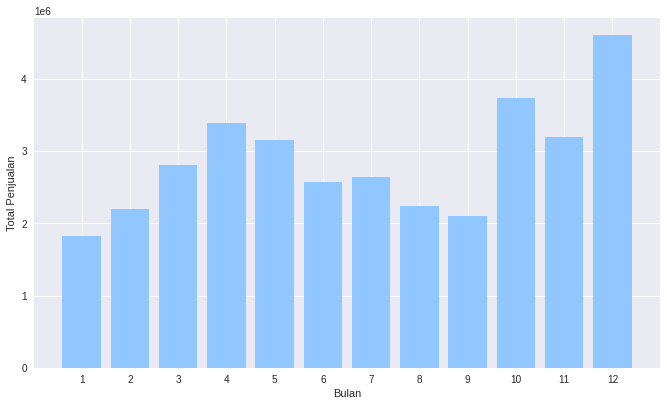

In [78]:
bulan = range(1,13)

plt.bar(bulan,bulantotal['Sales'])
plt.xticks(bulan)
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan')
plt.show()

Pertanyaan #2: Kota dengan penjualan terbanyak

In [79]:
kotabanyak = df.groupby('City').sum()
kotabanyak

,Quantity Ordered,Price Each,Month,Hour,Sales
City,,,,,
Atlanta (GA),16602,2.779908e+06,104794,214264,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,141946,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,288225,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,214390,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,427444,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,357696,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,35211,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,144421,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,643265,8.262204e+06


In [80]:
kota = [city for city, df in df.groupby('City')]

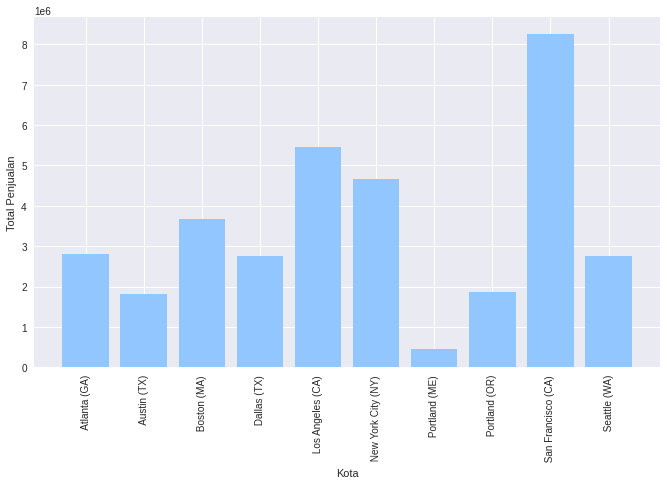

In [81]:
plt.bar(kota, kotabanyak['Sales'])
plt.xticks(kota, rotation=90)
plt.xlabel('Kota')
plt.ylabel('Total Penjualan')
plt.show()

Pertanyaan #3 Jam berapa para pelanggan membeli

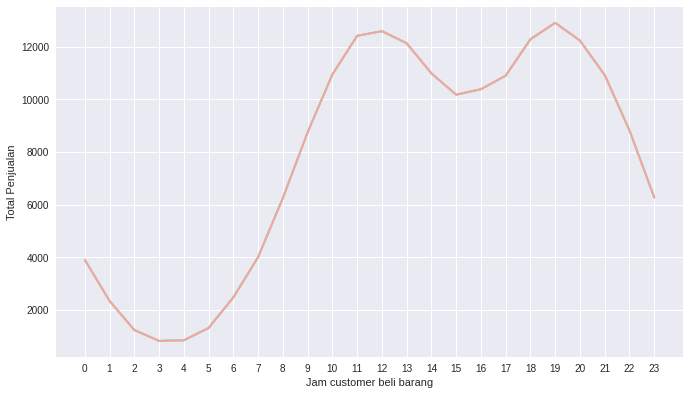

In [82]:
jam = [hour for hour, df in df.groupby('Hour')]

plt.plot(jam, df.groupby('Hour').count())
plt.xticks(jam)
#plt.grid()
plt.xlabel('Jam customer beli barang')
plt.ylabel('Total Penjualan')
plt.show()

Pertanyaan #4 Produk yang sering terjual bersama

In [83]:
dfd = df[df['Order ID'].duplicated(keep=False)]
dfd['Grouped'] = dfd.groupby('Order ID')['Product'].transform(lambda x: (',').join(x))
dfd

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour,Sales,City,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,600.00,Los Angeles (CA),"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,11.99,Los Angeles (CA),"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,19,600.00,Los Angeles (CA),"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,19,11.95,Los Angeles (CA),"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,11,99.99,Boston (MA),"Bose SoundSport Headphones,Bose SoundSport Hea..."
...,...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,20,3.84,Atlanta (GA),"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,0,11.99,Atlanta (GA),"Wired Headphones,AAA Batteries (4-pack)"
186804,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,0,5.98,Atlanta (GA),"Wired Headphones,AAA Batteries (4-pack)"
186841,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,13,600.00,San Francisco (CA),"Google Phone,USB-C Charging Cable"


In [84]:
dfd = dfd[['Order ID','Grouped']].drop_duplicates()
dfd

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [85]:
from itertools import combinations
from collections import Counter

In [86]:
#Pelanggaan membeli 2 barang secara bersamaan
count = Counter()

for row in dfd['Grouped']:
  row_list = row.split(',')
  count.update(Counter(combinations( row_list, 2)))

for key, value in count.most_common(10):
  print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [87]:
#Pelanggan membeli 3 barang secara bersamaan
hitung3 = Counter()
for row in dfd['Grouped']:
  row_list = row.split(',')
  hitung3.update(Counter(combinations(row_list, 3)))

for keys, values in hitung3.most_common(10):
  print(keys, values)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5


Pertanyaan #5 Produk terjual paling banyak

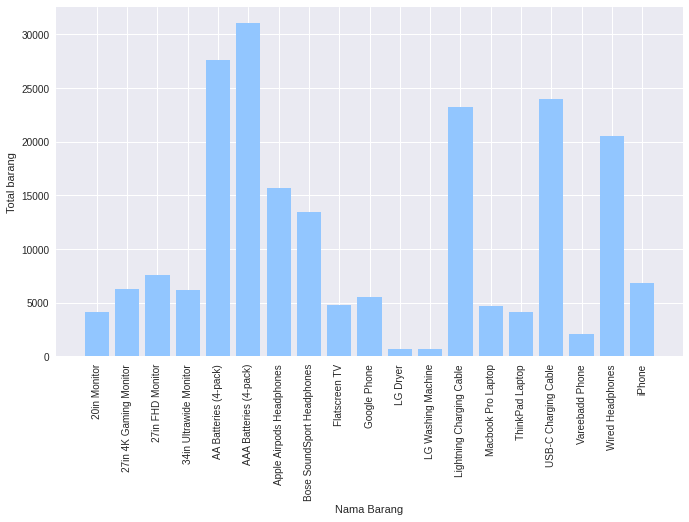

In [88]:
produkgrup = df.groupby('Product')
kuantitas= produkgrup.sum()['Quantity Ordered']

produk = [produkk for produkk, df in produkgrup]

plt.bar(produk, kuantitas)
plt.xticks(produk, rotation='vertical')
plt.ylabel('Total barang')
plt.xlabel('Nama Barang')
plt.show()

In [92]:
harga = df.groupby('Product').mean()['Price Each']

print(harga)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


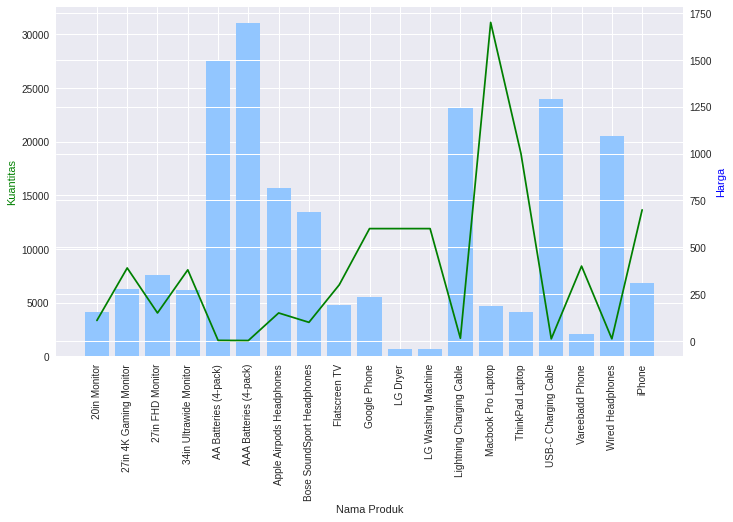

In [90]:
#membandingkan harga barang dengan banyaknya barang yang terjual
fig, ax1 = plt.subplots(figsize=(10, 6))

ax2 = ax1.twinx()
ax1.bar(produk, kuantitas)
ax2.plot(produk, harga, color='g')
ax1.set_xticklabels(produk,rotation=90)

ax1.set_xlabel('Nama Produk')
ax1.set_ylabel('Kuantitas', color='g')
ax2.set_ylabel('Harga', color='b')

plt.show()